# 122022010 Shrayank Mistry
# Implement Kmeans Clustering and DBScan Algorithm
<p> Fit both a k-means and a DBSCAN algorithm to the new data and visually assess the performance by plotting the cluster assignments with Matplotlib </p>

# Basic ML Packages

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors
import seaborn as sns

import queue as Q

from sklearn.datasets import make_blobs, make_circles, make_moons
from sklearn.metrics import accuracy_score

In [27]:
np.random.seed(0)

In [28]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['red', 'yellow', 'green'])

# K-Means Clustering Algorithm From Scratch

### Choose the initial centroids from the given dataset


In [29]:
def init_centroids(x, k):
    indexs = np.random.choice(a = range(0, x.shape[0]), size = k, replace = False)
    centroids = x[indexs]
    return centroids

### Find distance <i>(Euclidean)</i> between the dataset points and the current centroids found

In [30]:
def get_distance(x, centroids):
    return np.sum(np.square(x - centroids), axis = 1)

### Mapping the data-points to the clusters, based on their distances from centroids

In [31]:
def map_clusters(x, centroids):
    clusters = []
    for record in x:
        i = np.argmin(get_distance(record, centroids))
        clusters.append(i)
    clusters = np.array(clusters)
    return clusters

### K-means algorithm (Fit and Predict)

In [32]:
def k_means(x, y, k):
    centroids = init_centroids(x, k)
    clusters = map_clusters(x, centroids)

    epochs = 200
    loss = []

    for e in range(epochs):
        new_centroids = [x.shape[1] for _ in range(k)]

        for c in range(k):
            new_centroids[c] = np.mean(x[np.where(clusters == c)], axis = 0)

        #l = np.sum(centroid_diff(centroids, new_centroids))
        #loss.append(l)

        centroids = new_centroids[:]
        clusters = map_clusters(x, centroids)

    return clusters, centroids

# DBSCAN Algorithm from Scratch

### Find all the neighbouring points for any given point based on epsilon value

In [33]:
def neighbour_points(x, epsilon, point_id):
    neighbs = []

    k = 0
    for record in x:
        if np.sum(np.square(record - x[point_id])) <= epsilon:
            neighbs.append(k)
        k = k + 1
    return neighbs

### DBSCAN Algorithm (Fit and Predict)

In [34]:
def dbscan(x, epsilon, min_points):

    # outlier = 0, core = 10, border = 5
    point_label = [0 for i in range(x.shape[0])]
    point_neighbs_count = []

    core_points = []
    border_points = []

    for i in range(x.shape[0]):
        point_neighbs_count.append(neighbour_points(x, epsilon, i))
    
    k = 0
    for p in point_neighbs_count:
        if len(p) >= min_points:
            point_label[k] = 10
            core_points.append(k)
        else:
            border_points.append(k)
        k = k + 1
    
    for i in border_points:
        for j in point_neighbs_count[i]:
            if j in core_points:
                point_neighbs_count[i] = 5
                break
    
    cluster = 1
    for i in range(x.shape[0]):
        q = Q.Queue()

        if point_label[i] == 10:
            point_label[i] = cluster
            for n in point_neighbs_count[i]:
                if point_label[n] == 10:
                    q.put(n)
                    point_label[n] = cluster
                else:
                    point_label[n] = cluster
            
            while not q.empty():
                neighbs = point_neighbs_count[q.get()]
                for n in neighbs:
                    if point_label[n] == 10:
                        q.put(n)
                        point_label[n] = cluster
                    else:
                        point_label[n] = cluster
            cluster = cluster + 1

    return point_label, cluster

### Running K-means on Dummy 2-dimensional Data

In [35]:
x, y = make_blobs(n_samples = 1000, n_features = 2, centers = 4, random_state = 0, cluster_std = 0.70)

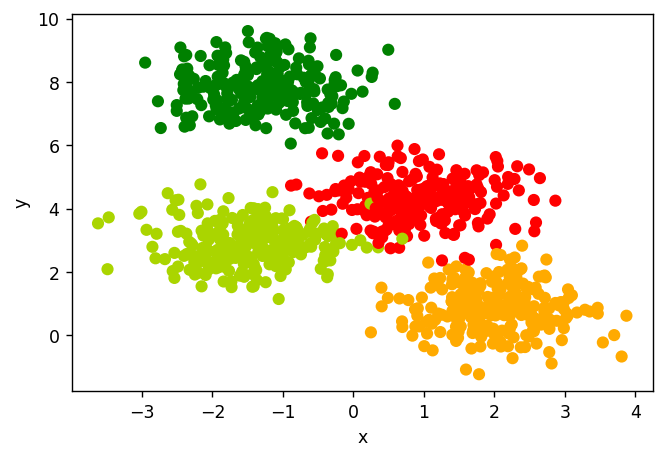

In [36]:
plt.figure(figsize = (6, 4), dpi = 125)
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = cmap)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [37]:
centers = 4
clusters, centroids = k_means(x, y, centers)
centroids = np.array([centroids[i] for i in range(centers)])

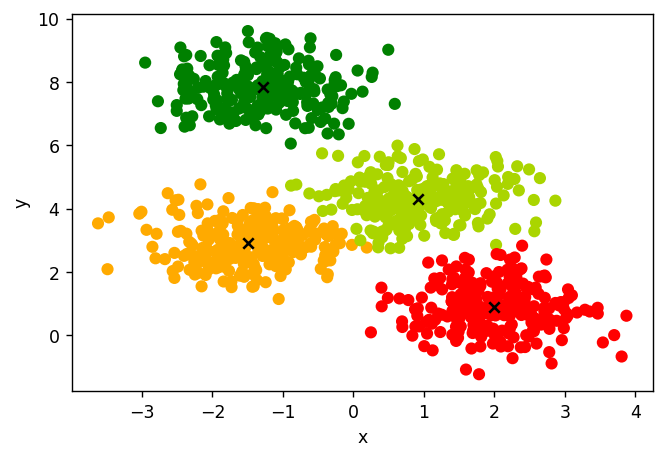

In [38]:
plt.figure(figsize = (6, 4), dpi = 125)
plt.scatter(x[:, 0], x[:, 1], c = clusters, cmap = cmap)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', color = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Running DBSCAN on Dummy 2-dimensional Data

In [39]:
x, y = make_circles(n_samples = 1000, random_state = 0, factor = 0.5, noise = 0.05)

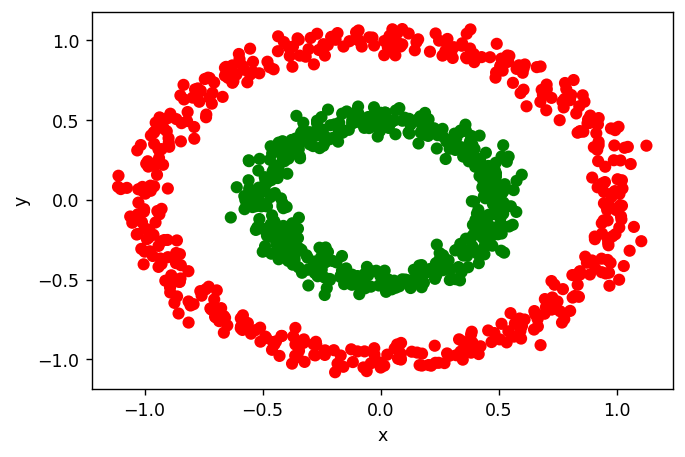

In [40]:
plt.figure(figsize = (6, 4), dpi = 125)
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = cmap)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [41]:
point_labels, clusters = dbscan(x, 0.05, 20)

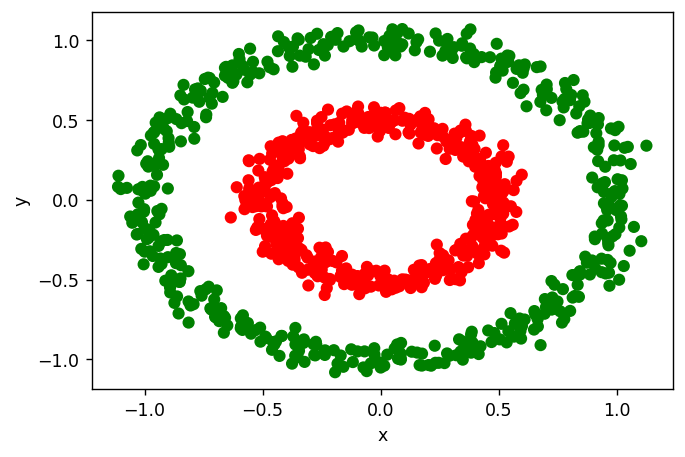

In [42]:
plt.figure(figsize = (6, 4), dpi = 125)
plt.scatter(x[:, 0], x[:, 1], c = point_labels, cmap = cmap)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Comparing KMeans DBSCAN on dummy data

In [43]:
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ['orange', 'blue'])

In [44]:
x, y = make_moons(n_samples = 1000, random_state = 0,noise = 0.05)

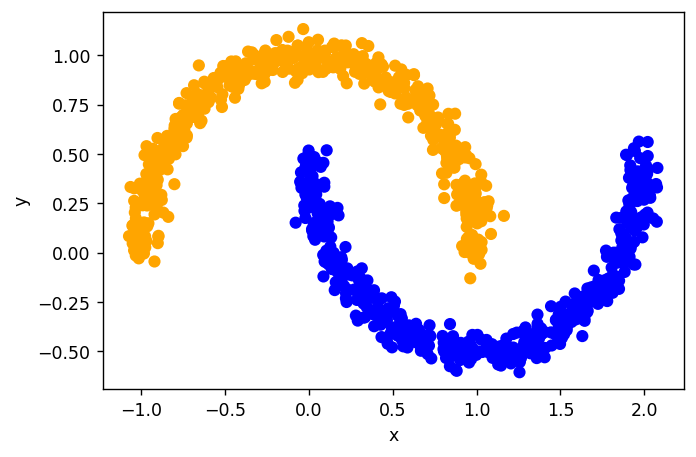

In [45]:
plt.figure(figsize = (6, 4), dpi = 125)
plt.scatter(x[:, 0], x[:, 1], c = y, cmap = cmap)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [46]:
centers = 2
clusters, centroids = k_means(x, y, centers)
centroids = np.array([centroids[i] for i in range(centers)])

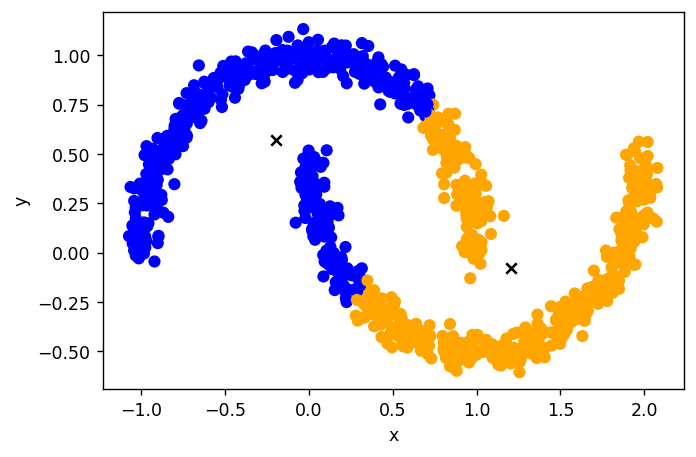

In [47]:
plt.figure(figsize = (6, 4), dpi = 125)
plt.scatter(x[:, 0], x[:, 1], c = clusters, cmap = cmap)
plt.scatter(centroids[:, 0], centroids[:, 1], marker = 'x', color = 'black')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [48]:
point_labels, clusters = dbscan(x, 0.05, 20)

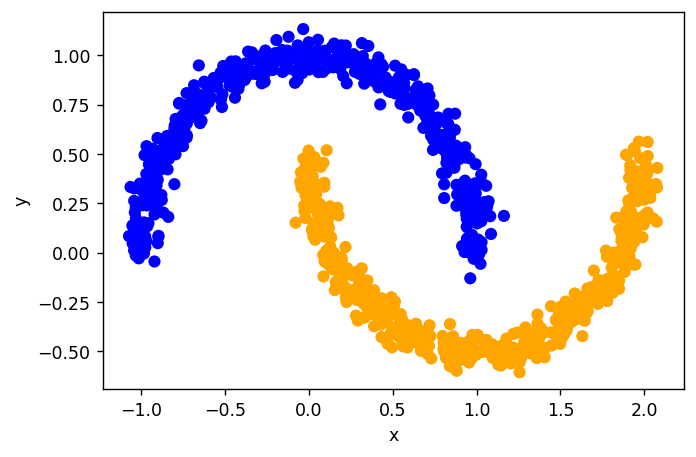

In [49]:
plt.figure(figsize = (6, 4), dpi = 125)
plt.scatter(x[:, 0], x[:, 1], c = point_labels, cmap = cmap)
plt.xlabel('x')
plt.ylabel('y')
plt.show()

# Real World Dataset KMeans Example

### Cars Data Preprocessing

In [50]:
cars_data = pd.read_csv('cars.csv')
cars_data.columns = ['mpg', 'cylinders', 'cubic-inches', 'hp', 'weights-lbs','time-to-60','year','brand']
cars_data.head(3)

,mpg,cylinders,cubic-inches,hp,weights-lbs,time-to-60,year,brand
0,14.0,8,350,165,4209,12,1972,US.
1,31.9,4,89,71,1925,14,1980,Europe.
2,17.0,8,302,140,3449,11,1971,US.


In [51]:
countries = {' US.': 1, 
             ' Europe.': 2,
             ' Japan.': 3}

brands = cars_data['brand']
brand_n = []

for b in brands:
    brand_n.append(countries[b])

In [52]:
cars_data['brand_n'] = brand_n
cars_data.drop('brand', axis = 1, inplace = True)
cars_data.replace(' ', np.nan, inplace = True)
cars_data.dropna(axis = 0, inplace = True)

cars_data = cars_data.convert_dtypes(infer_objects = True)
cars_data['cubic-inches'] = [int(i) for i in cars_data['cubic-inches']]
cars_data['weights-lbs'] = [int(i) for i in cars_data['weights-lbs']]

In [53]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 256 entries, 0 to 260
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           256 non-null    float64
 1   cylinders     256 non-null    Int64  
 2   cubic-inches  256 non-null    int64  
 3   hp            256 non-null    Int64  
 4   weights-lbs   256 non-null    int64  
 5   time-to-60    256 non-null    Int64  
 6   year          256 non-null    Int64  
 7   brand_n       256 non-null    Int64  
dtypes: Int64(5), float64(1), int64(2)
memory usage: 19.2 KB


In [54]:
import time

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import ParameterGrid
from sklearn.cluster import KMeans

In [55]:
cars_data_scaled = cars_data.copy()

cars_data_scaled[cars_data.columns] = StandardScaler().fit_transform(cars_data_scaled)
print(cars_data_scaled.describe())

                mpg     cylinders  ...          year       brand_n
count  2.560000e+02  2.560000e+02  ...  2.560000e+02  2.560000e+02
mean   1.737976e-16  1.669671e-17  ... -5.529431e-18  9.280771e-17
std    1.001959e+00  1.001959e+00  ...  1.001959e+00  1.001959e+00
min   -1.678778e+00 -1.485670e+00  ... -1.606222e+00 -7.265700e-01
25%   -8.131074e-01 -9.120175e-01  ... -7.794270e-01 -7.265700e-01
50%   -1.511243e-01 -3.383652e-01  ...  4.736849e-02 -7.265700e-01
75%    7.209111e-01  1.382592e+00  ...  8.741640e-01  5.217650e-01
max    2.980565e+00  1.382592e+00  ...  1.700959e+00  1.770100e+00

[8 rows x 8 columns]


In [56]:
pca_2 = PCA(n_components = 2)
pca_2_result = pca_2.fit_transform(cars_data_scaled)
print('Explained variation per principal component: {}'.format(pca_2.explained_variance_ratio_))
print('Cumulative variance explained by 2 principal components: {:.2%}'.format(np.sum(pca_2.explained_variance_ratio_)))

Explained variation per principal component: [0.68495423 0.11903557]
Cumulative variance explained by 2 principal components: 80.40%


In [57]:
def kmean_hyper_param_tuning(data):
    
    parameters = [2, 3, 4, 5, 6, 7, 8]

    parameter_grid = ParameterGrid({'n_clusters': parameters})

    best_score = -1
    kmeans_model = KMeans()     
    silhouette_scores = []

    for p in parameter_grid:
        kmeans_model.set_params(**p)  
        kmeans_model.fit(data)          

        ss = metrics.silhouette_score(data, kmeans_model.labels_) 
        silhouette_scores += [ss]      

        
        if ss > best_score:
            best_score = ss
            best_grid = p

    plt.figure(figsize = (6, 4), dpi = 125)
    plt.bar(range(len(silhouette_scores)), list(silhouette_scores), align='center', color='#722f59', width=0.5)
    plt.xticks(range(len(silhouette_scores)), list(parameters))
    plt.title('Silhouette Score', fontweight='bold')
    plt.xlabel('Number of Clusters')
    plt.show()

    return best_grid['n_clusters']

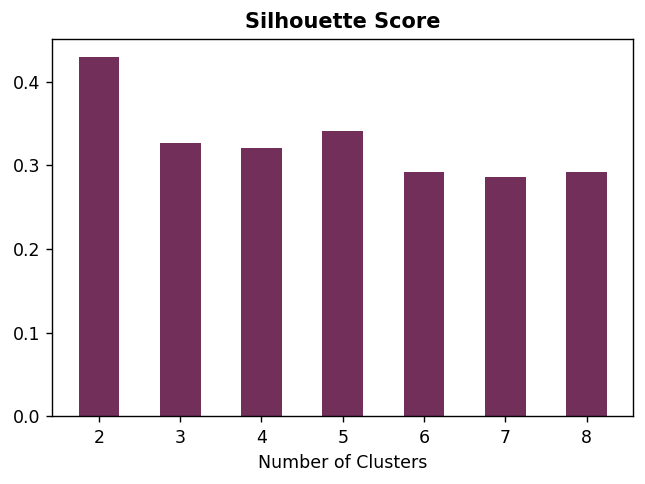

In [58]:
optimum_num_clusters = kmean_hyper_param_tuning(cars_data_scaled)

In [59]:
kmeans = KMeans(n_clusters = optimum_num_clusters)
kmeans.fit(cars_data_scaled)
centroids = kmeans.cluster_centers_
centroids_pca = pca_2.transform(centroids)

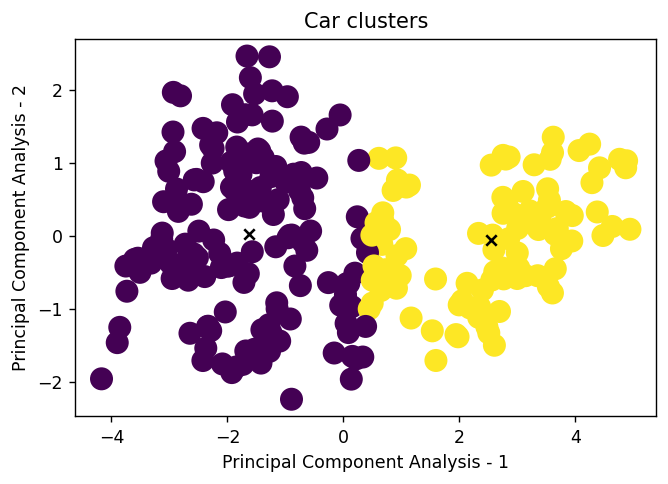

In [60]:
x = pca_2_result[:, 0]
y = pca_2_result[:, 1]

plt.figure(figsize = (6, 4), dpi = 125)
plt.scatter(x, y, c = kmeans.labels_, alpha = 1.0, s = 150)  
plt.title('Car clusters')
plt.xlabel('Principal Component Analysis - 1')
plt.ylabel('Principal Component Analysis - 2')

plt.scatter(centroids_pca[:, 0], centroids_pca[:, 1], marker ='x', color = 'black')

plt.show()

# Real World Dataset DBSCAN Example

In [61]:
mall_data = pd.read_csv('Mall_Customers.csv')

In [62]:
mall_data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [63]:
x = mall_data[['Annual Income (k$)', 'Spending Score (1-100)']].values

In [64]:
print(x.shape)

(200, 2)


In [65]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 3, min_samples = 4, metric = 'euclidean')

In [66]:
model = db.fit(x)

In [67]:
label = model.labels_

In [68]:
n_clusters = len(set(label)) - (1 if -1 in label else 0)
print('No of clusters:', n_clusters)

No of clusters: 9


In [69]:
y = db.fit_predict(x)

In [70]:
x_plot = []
y_plot = []
k = 0
for record in x:
    if label[k] != -1:
        x_plot.append(record)
        y_plot.append(label[k])
    k = k + 1
x_plot = np.array(x_plot)
y_plot = np.array(y_plot)

In [71]:
print(x_plot.shape, y_plot.shape)

(79, 2) (79,)


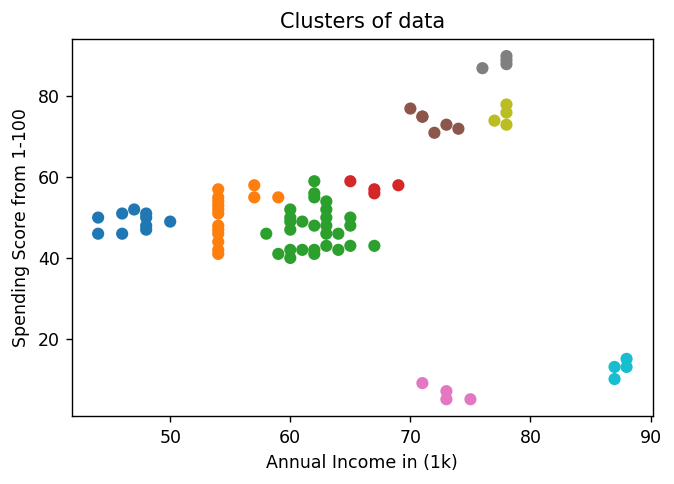

In [72]:
plt.figure(figsize = (6, 4), dpi = 125)
plt.scatter(x_plot[:, 0], x_plot[:, 1], c = y_plot, cmap = 'tab10')
plt.xlabel('Annual Income in (1k)')
plt.ylabel('Spending Score from 1-100')
plt.title('Clusters of data')
plt.show()